Shift Samples: 3


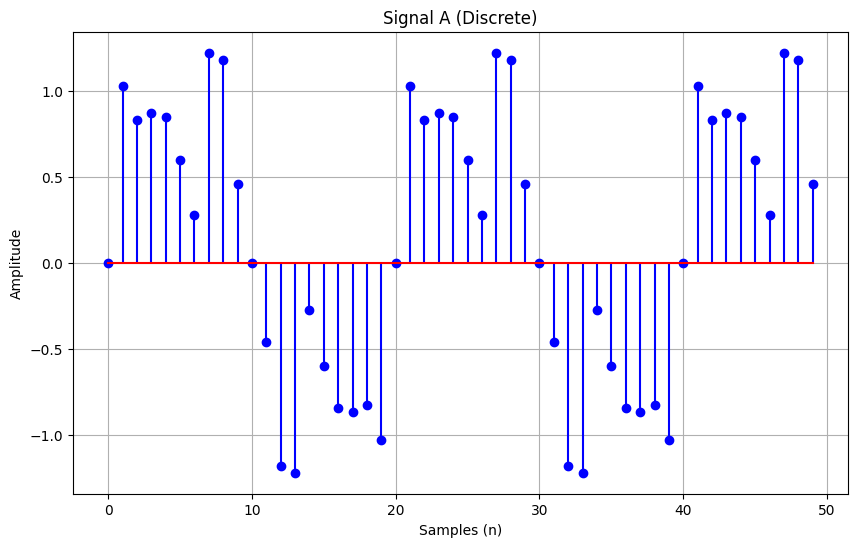

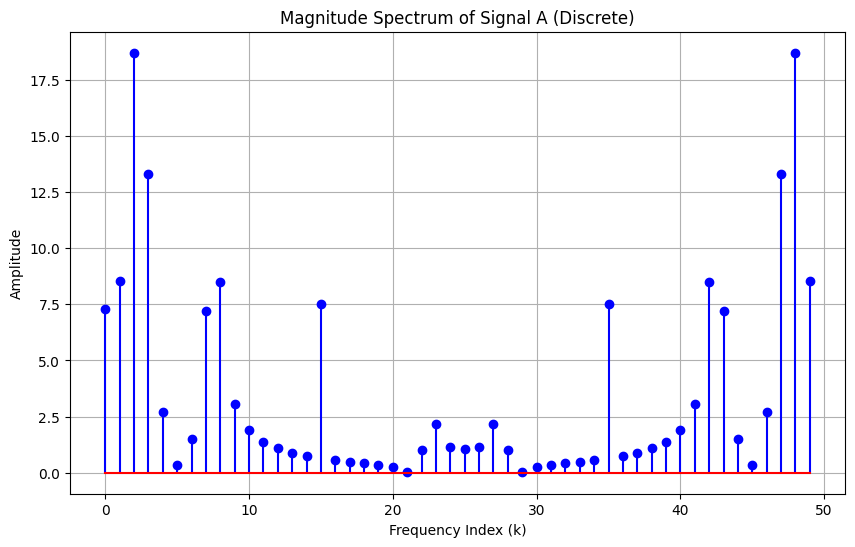

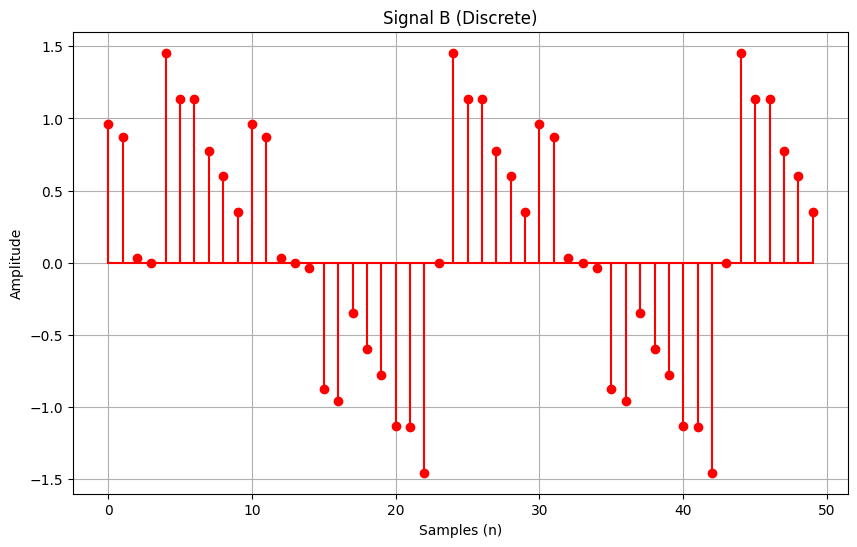

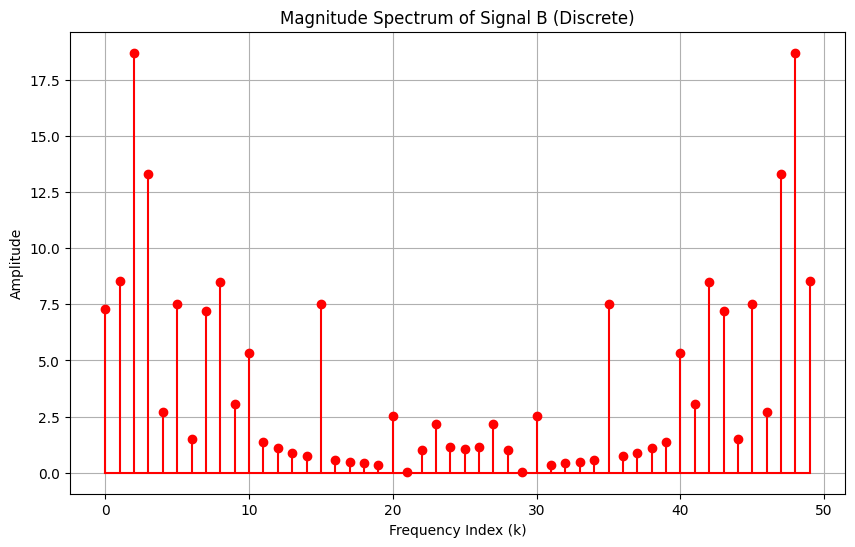

c:\Users\shams\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


ValueError: could not broadcast input array from shape (99,) into shape (50,)

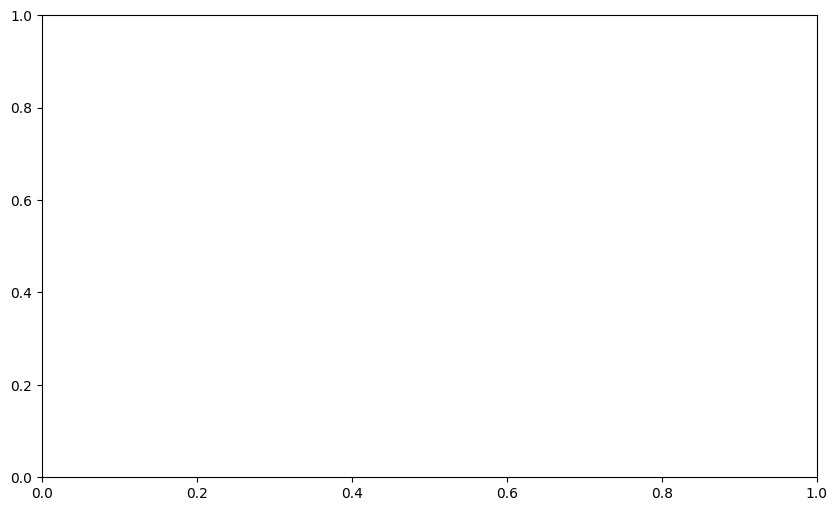

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n=50
samples = np.arange(n) 
sampling_rate=100
wave_velocity=8000



#use this function to generate signal_A and signal_B with a random shift
def generate_signals(frequency=5):

    noise_freqs = [15, 30, 45]  # Default noise frequencies in Hz

    amplitudes = [0.5, 0.3, 0.1]  # Default noise amplitudes
    noise_freqs2 = [10, 20, 40] 
    amplitudes2 = [0.3, 0.2, 0.1]
    
     # Discrete sample indices
    dt = 1 / sampling_rate  # Sampling interval in seconds
    time = samples * dt  # Time points corresponding to each sample

    # Original clean signal (sinusoidal)
    original_signal = np.sin(2 * np.pi * frequency * time)

    # Adding noise
    noise_for_sigal_A = sum(amplitude * np.sin(2 * np.pi * noise_freq * time)
                for noise_freq, amplitude in zip(noise_freqs, amplitudes))
    noise_for_sigal_B = sum(amplitude * np.sin(2 * np.pi * noise_freq * time)
                for noise_freq, amplitude in zip(noise_freqs2, amplitudes2))
    signal_A = original_signal + noise_for_sigal_A 
    noisy_signal_B = signal_A + noise_for_sigal_B

    # Applying random shift
    shift_samples = np.random.randint(-n // 2, n // 2)  # Random shift
    shift_samples=3  #--------------------------------------------------------------------------------------- to match with the spec
    print(f"Shift Samples: {shift_samples}")
    signal_B = np.roll(noisy_signal_B, shift_samples)
    
    return signal_A, signal_B

#implement other functions and logic


def dft(signal):
    """Compute the Discrete Fourier Transform (DFT) of a signal."""
    N = len(signal)
    dft_output = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            dft_output[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return dft_output

def idft(signal_freq):
    """Compute the Inverse Discrete Fourier Transform (IDFT)."""
    N = len(signal_freq)
    idft_output = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            idft_output[n] += signal_freq[k] * np.exp(2j * np.pi * k * n / N)
    return idft_output / N

# def cross_correlation(signal_A, signal_B):
#     """Compute the cross-correlation between two signals using DFT."""
#     # Compute DFT of both signals
#     dft_A = dft(signal_A)
#     dft_B = dft(signal_B)

#     # Compute cross-correlation in frequency domain
#     cross_corr_freq = dft_A * np.conj(dft_B)

#     # Compute IDFT to get the cross-correlation in the time domain
#     cross_corr = idft(cross_corr_freq)

#     # Return the real part (imaginary part is negligible due to noise)
#     return np.real(cross_corr)

def cross_correlation(signal_A, signal_B):
    """Compute the cross-correlation between two signals using DFT and IDFT."""
    # Step 1: Compute DFT of both signals
    dft_A = dft(signal_A)
    dft_B = dft(signal_B)

    # Step 2: Compute the frequency-domain cross-correlation
    cross_corr_freq = dft_A * np.conj(dft_B)

    # Step 3: Compute IDFT to obtain cross-correlation in time domain
    cross_corr_time = idft(cross_corr_freq)

    # Step 4: Return the real part (ignoring numerical imaginary components)
    return np.real(cross_corr_time)



def find_sample_lag(cross_corr):
    """Find the sample lag corresponding to the maximum correlation."""
    lag_index = np.argmax(cross_corr)  # Index of the maximum correlation
    return lag_index if lag_index < len(cross_corr) // 2 else lag_index - len(cross_corr)


def estimate_distance(sample_lag, sampling_rate, wave_velocity):
    """Estimate distance between stations using sample lag."""
    time_delay = abs(sample_lag) / sampling_rate
    distance = time_delay * wave_velocity
    return distance

# # Generate signals
# signal_A, signal_B = generate_signals()

# Generate signals
signal_A, signal_B = generate_signals()

# Compute DFT of Signal A and Signal B
dft_signal_A = dft(signal_A)
dft_signal_B = dft(signal_B)

# Magnitude spectra of Signal A and Signal B
magnitude_spectrum_A = np.abs(dft_signal_A)
magnitude_spectrum_B = np.abs(dft_signal_B)

# Plot Signal A (Discrete)
plt.figure(figsize=(10, 6))
plt.stem(samples, signal_A, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title("Signal A (Discrete)")
plt.xlabel("Samples (n)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Plot Spectrum of Signal A (Discrete)
plt.figure(figsize=(10, 6))
plt.stem(samples, magnitude_spectrum_A, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title("Magnitude Spectrum of Signal A (Discrete)")
plt.xlabel("Frequency Index (k)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Plot Signal B (Discrete)
plt.figure(figsize=(10, 6))
plt.stem(samples, signal_B, linefmt='red', markerfmt='o', basefmt='r-')
plt.title("Signal B (Discrete)")
plt.xlabel("Samples (n)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Plot Spectrum of Signal B (Discrete)
plt.figure(figsize=(10, 6))
plt.stem(samples, magnitude_spectrum_B, linefmt='red', markerfmt='o', basefmt='r-')
plt.title("Magnitude Spectrum of Signal B (Discrete)")
plt.xlabel("Frequency Index (k)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


# # Compute cross-correlation
# cross_corr = cross_correlation(signal_A, signal_B)

# # Find sample lag
# sample_lag = find_sample_lag(cross_corr)
# print(f"Sample Lag: {sample_lag}")

# # Estimate distance
# distance = estimate_distance(sample_lag, sampling_rate, wave_velocity)
# print(f"Estimated Distance: {distance:.2f} meters")

# # Plot Cross-Correlation
# lags = np.arange(-n // 2, n // 2)
# plt.figure(figsize=(10, 5))
# plt.plot(lags, np.roll(cross_corr, n // 2), label="Cross-Correlation", color='green')
# plt.axvline(sample_lag, color='red', linestyle='--', label=f"Sample Lag: {sample_lag}")
# plt.title("Cross-Correlation Between Signal A and Signal B")
# plt.xlabel("Lag (samples)")
# plt.ylabel("Correlation")
# plt.legend()
# plt.grid(True)
# plt.show()

# Compute cross-correlation
cross_corr = cross_correlation(signal_A, signal_B)

# Generate lag indices
lags = np.arange(-n // 2, n // 2)

# Roll the cross-correlation result for proper alignment
cross_corr = np.roll(cross_corr, n // 2)

# Plot Cross-Correlation (Discrete)
plt.figure(figsize=(10, 6))
plt.stem(lags, cross_corr, linefmt='g-', markerfmt='go', basefmt='r-')
plt.title("Cross-Correlation (Discrete)")
plt.xlabel("Lag (samples)")
plt.ylabel("Correlation")
plt.axvline(0, color='red', linestyle='--', label="Zero Lag")
plt.legend()
plt.grid(True)
plt.show()




